In [11]:
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
df = pd.read_csv('../data/real_dataset.csv').sample(frac=0.25)

In [13]:
try:
    y = pd.factorize(df['belongs'])[0]
    df.drop(['belongs', 'playlist'], axis=1, inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
except KeyError:
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [14]:
clf = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
# Why use linearSVC? much faster, issues with regular sklearn svc

In [16]:
clf.fit(x_train, y_train)

LinearSVC(dual=False)

In [17]:
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='accuracy')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='f1')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='precision')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='recall')))

0.48982135438304947
0.5115916226398001
0.49119537892225534


0.5338865836791148


In [18]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.5068550062318239

[[1721 1885]
 [1676 1939]]


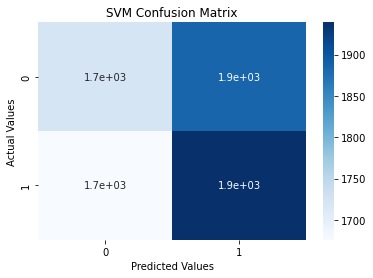

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('SVM Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
tmp = ax.get_figure()
tmp.savefig("../omni/app/static/images/conf_mat_svm.png")
